In [2]:
import zipfile

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [9]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [10]:
shorten_train_ds = train_ds.take(100)

In [11]:
images = []
labels = []

for image_batch, label_batch in shorten_train_ds:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

images = np.array(images)
labels = np.array(labels)
datagen.fit(images)

train_generator = datagen.flow(images, labels, batch_size=32)

In [17]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [19]:
history = model.fit(train_generator, validation_data=validation_ds, epochs=20)

Epoch 1/20
100/100 [==============================] - 59s 586ms/step - loss: 0.6663 - accuracy: 0.5928 - val_loss: 33.7139 - val_accuracy: 0.5292
Epoch 2/20
100/100 [==============================] - 55s 549ms/step - loss: 0.6545 - accuracy: 0.6159 - val_loss: 16.8048 - val_accuracy: 0.6020
Epoch 3/20
100/100 [==============================] - 55s 556ms/step - loss: 0.6429 - accuracy: 0.6459 - val_loss: 15.7014 - val_accuracy: 0.6152
Epoch 4/20
100/100 [==============================] - 54s 545ms/step - loss: 0.6322 - accuracy: 0.6534 - val_loss: 55.2153 - val_accuracy: 0.5638
Epoch 5/20
100/100 [==============================] - 56s 561ms/step - loss: 0.6482 - accuracy: 0.6316 - val_loss: 39.6029 - val_accuracy: 0.6068
Epoch 6/20
100/100 [==============================] - 57s 566ms/step - loss: 0.6038 - accuracy: 0.6697 - val_loss: 72.4203 - val_accuracy: 0.6176
Epoch 7/20
100/100 [==============================] - 59s 587ms/step - loss: 0.6065 - accuracy: 0.6716 - val_loss: 28.8494 -

In [20]:
import matplotlib.pyplot as plt

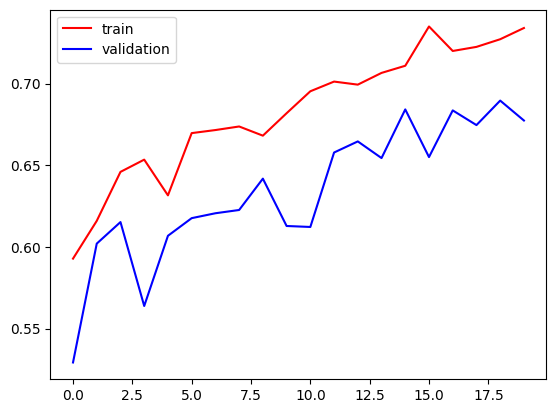

In [21]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()